We found that this method is sensitive to step size. Step size 0.2 will give divergent predictions. Step size 0.01 is OK.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import pickle

In [2]:
with open('2-d_bier.pkl', 'rb') as file:
    bier = pickle.load(file)

In [8]:
time_points = bier['t']
bier_pred = bier['pred']
bier_data = bier['data'].reshape(-1,2)

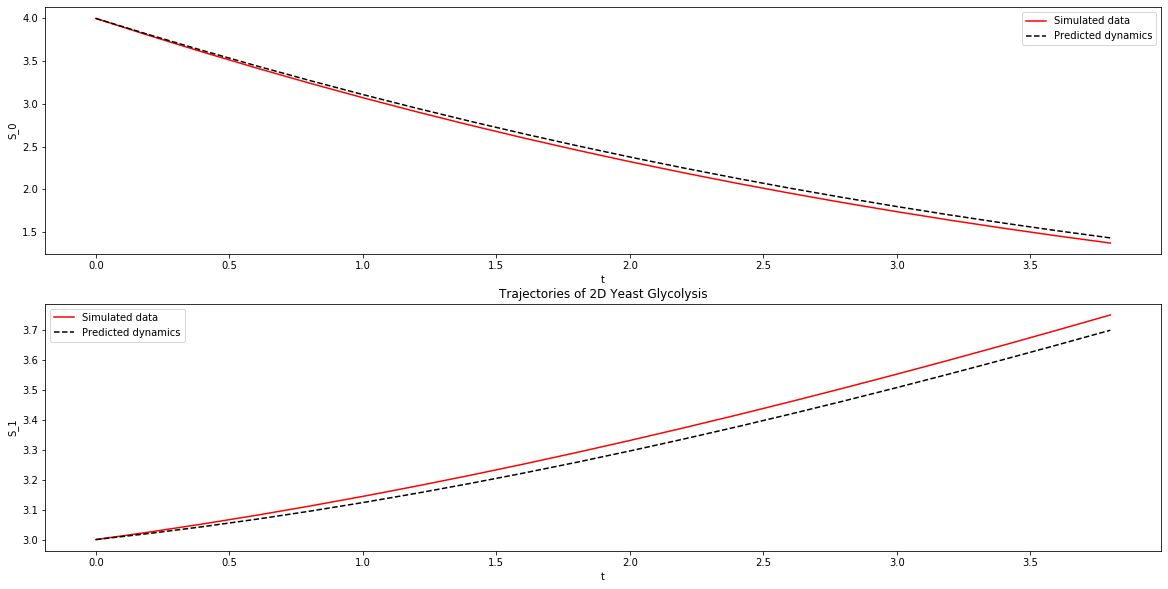

In [12]:
plt.figure(figsize=(20, 10))

for species in range(2):
    plt.subplot(2,1,species + 1)
    plt.plot(time_points[:20], bier_data[:20, species], 'r-', label='Simulated data')
    plt.plot(time_points[:20], bier_pred[:20,species], 'k--', label='Predicted dynamics')
    plt.xlabel('t')
    plt.ylabel('S_' + str(species))
    plt.legend()
    
plt.title('Trajectories of 2D Yeast Glycolysis')
plt.show()

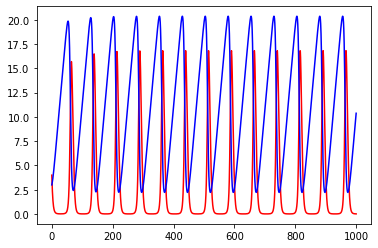

In [11]:
plt.plot(time_points, bier_data[:, 0], 'r-', label='ATP')
plt.plot(time_points, bier_data[:, 1], 'b-', label='G')

In [13]:
with open('2-d_bier.pkl', 'rb') as file:
    bier_BDF = pickle.load(file)

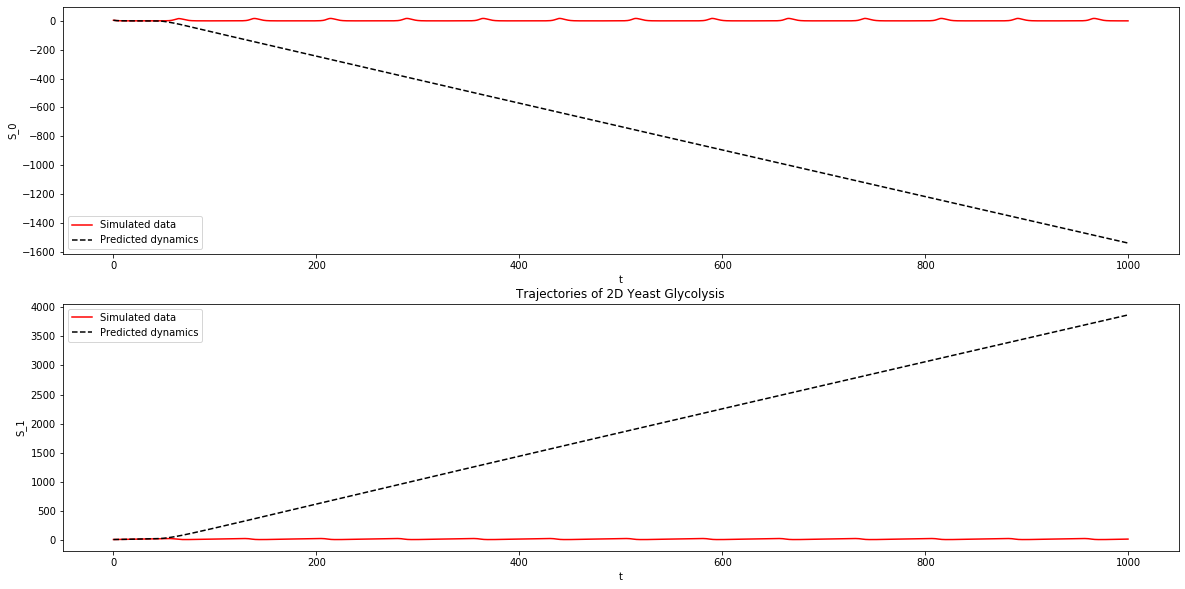

In [15]:
time_points = bier['t']
bier_pred = bier['pred']
bier_data = bier['data'].reshape(-1,2)

plt.figure(figsize=(20, 10))

for species in range(2):
    plt.subplot(2,1,species + 1)
    plt.plot(time_points, bier_data[:, species], 'r-', label='Simulated data')
    plt.plot(time_points, bier_pred[:,species], 'k--', label='Predicted dynamics')
    plt.xlabel('t')
    plt.ylabel('S_' + str(species))
    plt.legend()
    
plt.title('Trajectories of 2D Yeast Glycolysis')
plt.show()

Space of negative concentrations.

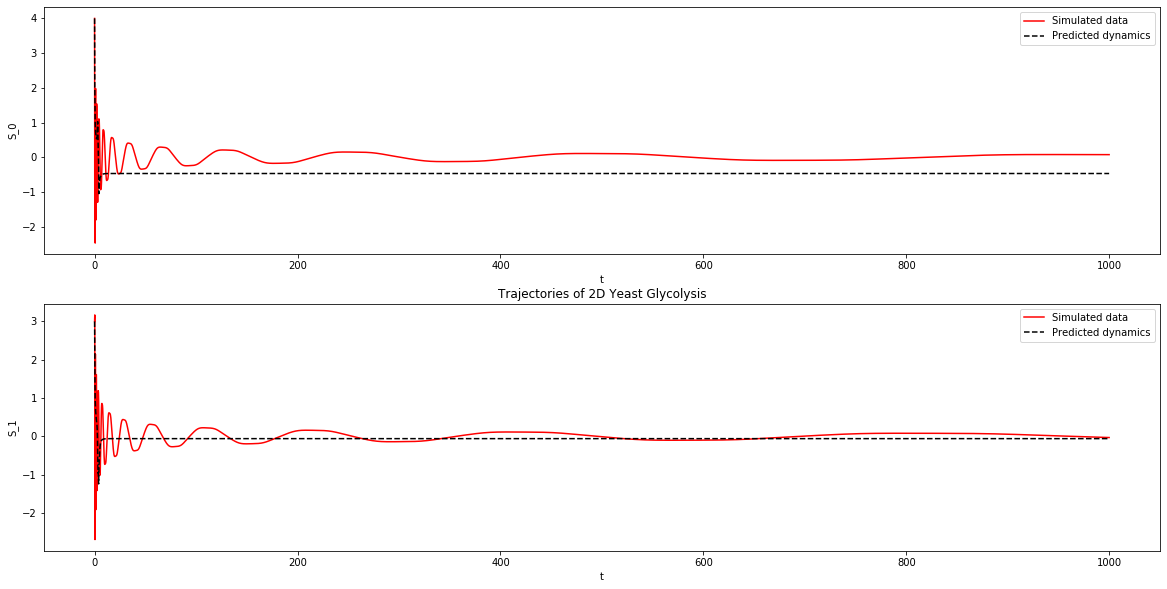

In [17]:
# with h = 0.2
with open('cubic.pkl', 'rb') as file:
    cubic = pickle.load(file)
time_points = cubic['t']
bier_pred = cubic['pred']
bier_data = cubic['data'].reshape(-1,2)

plt.figure(figsize=(20, 10))

for species in range(2):
    plt.subplot(2,1,species + 1)
    plt.plot(time_points, bier_data[:, species], 'r-', label='Simulated data')
    plt.plot(time_points, bier_pred[:,species], 'k--', label='Predicted dynamics')
    plt.xlabel('t')
    plt.ylabel('S_' + str(species))
    plt.legend()
    
plt.title('Trajectories of 2D Yeast Glycolysis')
plt.show()

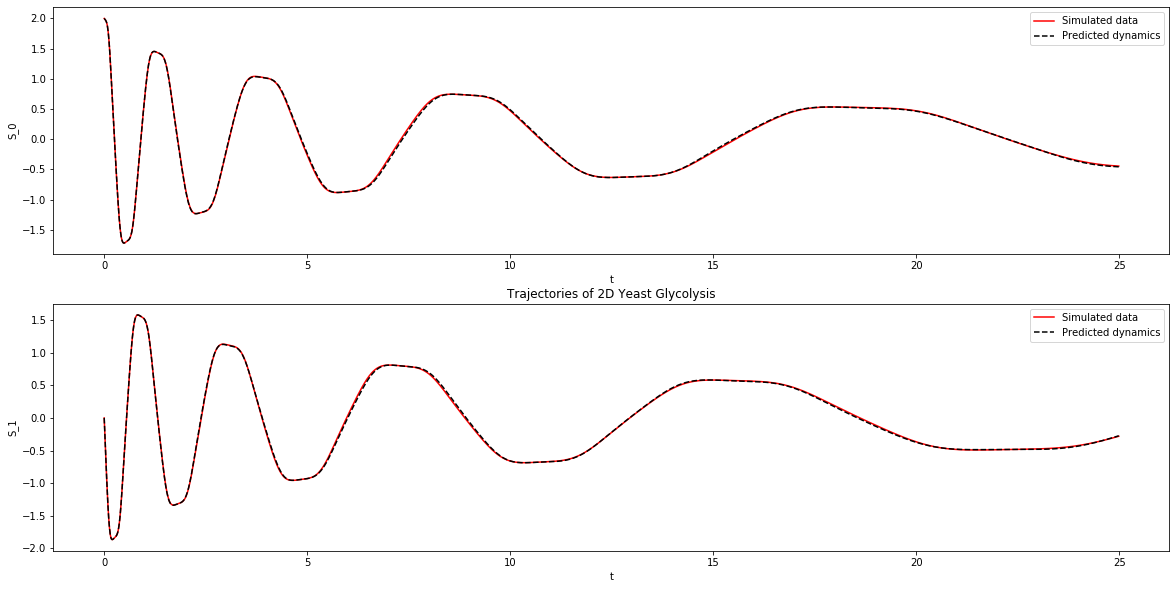

In [18]:
# with h = 0.01
with open('cubic.pkl', 'rb') as file:
    cubic = pickle.load(file)
time_points = cubic['t']
bier_pred = cubic['pred']
bier_data = cubic['data'].reshape(-1,2)

plt.figure(figsize=(20, 10))

for species in range(2):
    plt.subplot(2,1,species + 1)
    plt.plot(time_points, bier_data[:, species], 'r-', label='Simulated data')
    plt.plot(time_points, bier_pred[:,species], 'k--', label='Predicted dynamics')
    plt.xlabel('t')
    plt.ylabel('S_' + str(species))
    plt.legend()
    
plt.title('Trajectories of 2D Yeast Glycolysis')
plt.show()

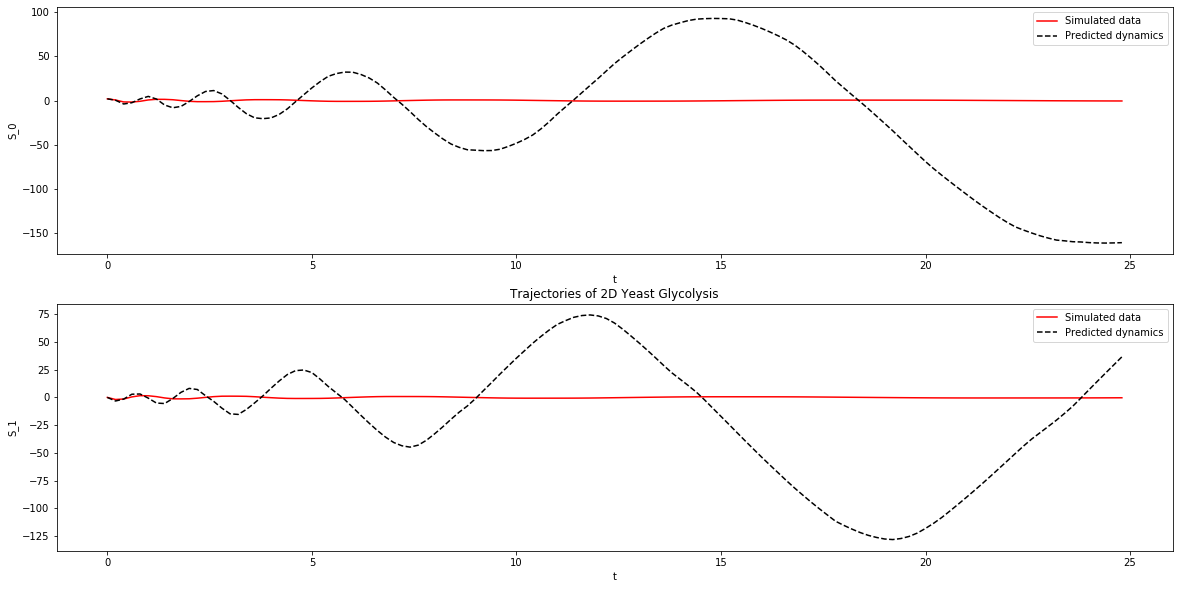

In [19]:
# with h = 0.2 but t0 = 0, T = 25
with open('cubic.pkl', 'rb') as file:
    cubic = pickle.load(file)
time_points = cubic['t']
bier_pred = cubic['pred']
bier_data = cubic['data'].reshape(-1,2)

plt.figure(figsize=(20, 10))

for species in range(2):
    plt.subplot(2,1,species + 1)
    plt.plot(time_points, bier_data[:, species], 'r-', label='Simulated data')
    plt.plot(time_points, bier_pred[:,species], 'k--', label='Predicted dynamics')
    plt.xlabel('t')
    plt.ylabel('S_' + str(species))
    plt.legend()
    
plt.title('Trajectories of 2D Yeast Glycolysis')
plt.show()

step size is  0.05


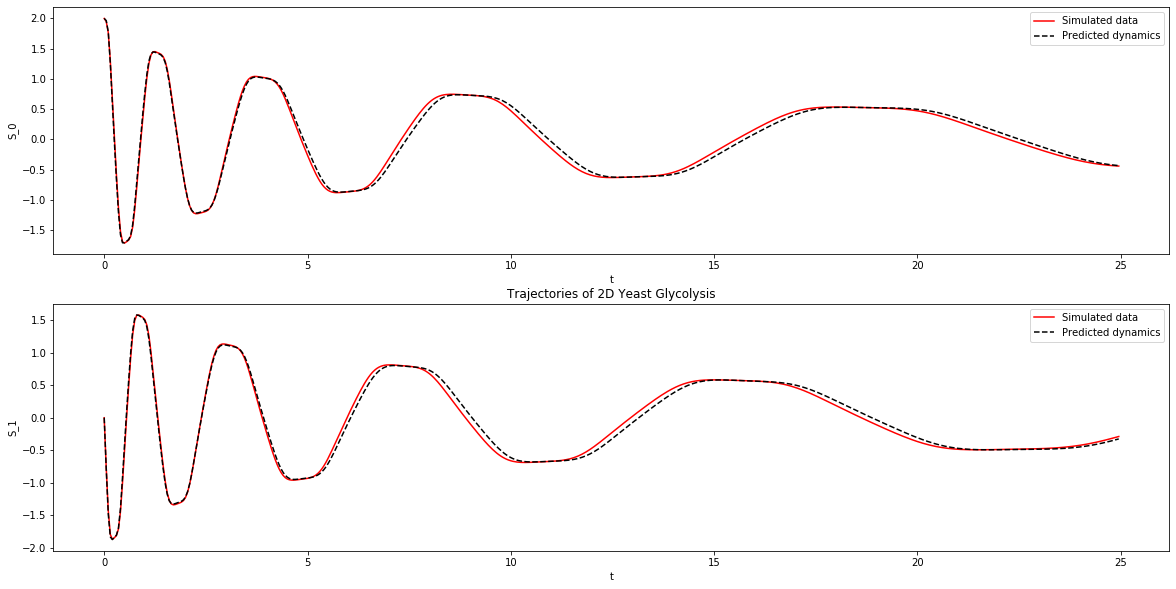

In [20]:
with open('cubic.pkl', 'rb') as file:
    cubic = pickle.load(file)
time_points = cubic['t']
bier_pred = cubic['pred']
bier_data = cubic['data'].reshape(-1,2)

print("step size is ", time_points[1] - time_points[0])

plt.figure(figsize=(20, 10))

for species in range(2):
    plt.subplot(2,1,species + 1)
    plt.plot(time_points, bier_data[:, species], 'r-', label='Simulated data')
    plt.plot(time_points, bier_pred[:,species], 'k--', label='Predicted dynamics')
    plt.xlabel('t')
    plt.ylabel('S_' + str(species))
    plt.legend()
    
plt.title('Trajectories of 2D Yeast Glycolysis')
plt.show()

step size is  0.02


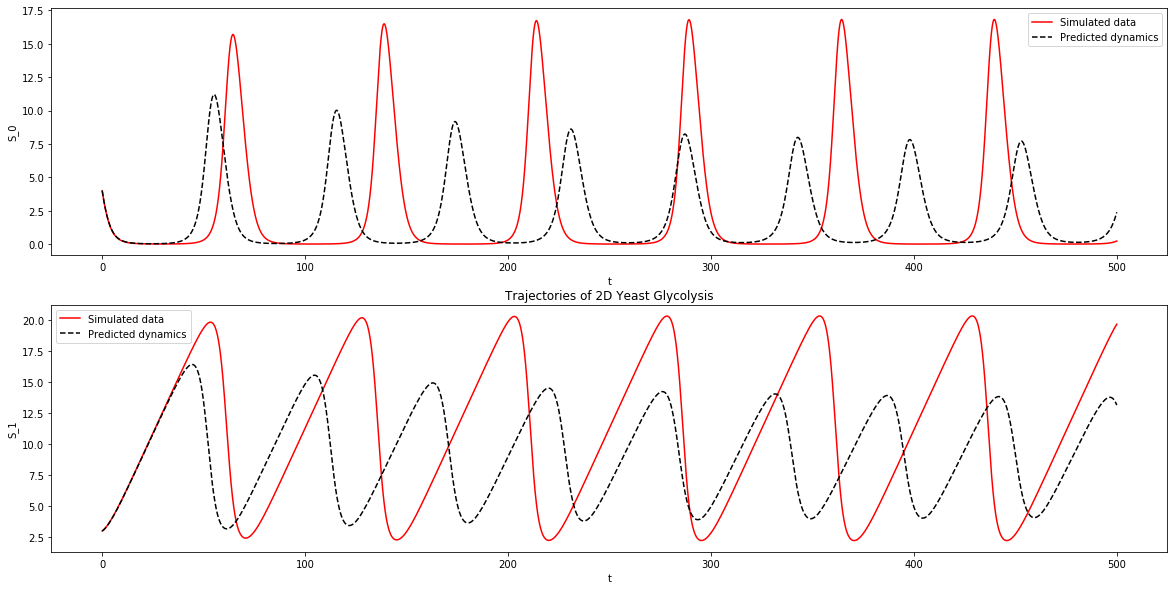

In [21]:
with open('bier.pkl', 'rb') as file:
    cubic = pickle.load(file)
time_points = cubic['t']
bier_pred = cubic['pred']
bier_data = cubic['data'].reshape(-1,2)

print("step size is ", time_points[1] - time_points[0])

plt.figure(figsize=(20, 10))

for species in range(2):
    plt.subplot(2,1,species + 1)
    plt.plot(time_points, bier_data[:, species], 'r-', label='Simulated data')
    plt.plot(time_points, bier_pred[:,species], 'k--', label='Predicted dynamics')
    plt.xlabel('t')
    plt.ylabel('S_' + str(species))
    plt.legend()
    
plt.title('Trajectories of 2D Yeast Glycolysis')
plt.show()

step size is  0.005


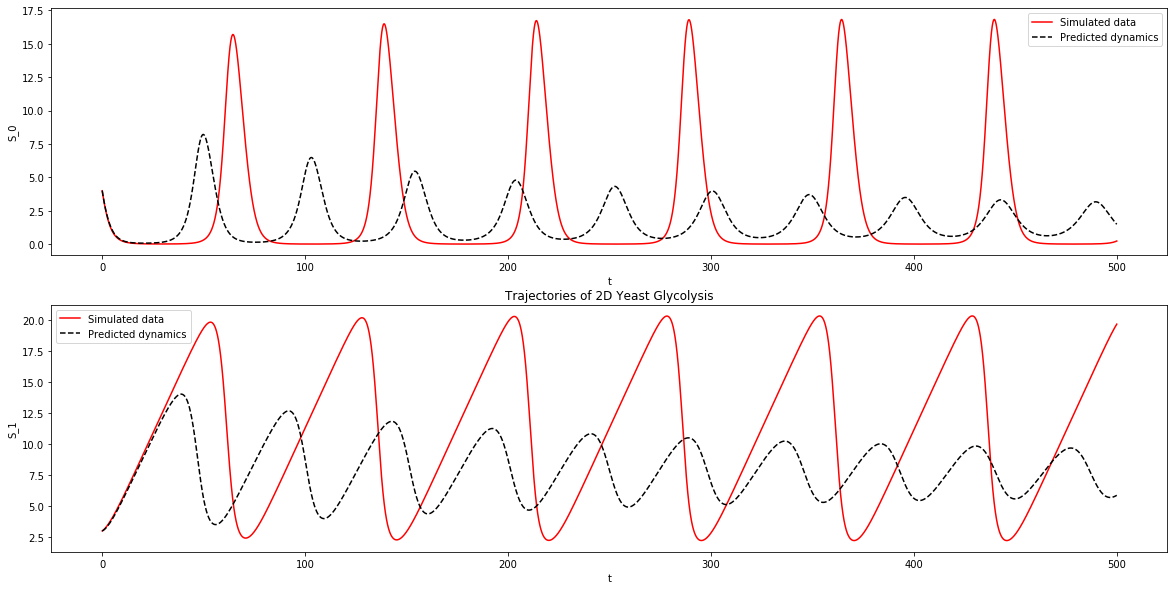

In [2]:
with open('bier.pkl', 'rb') as file:
    cubic = pickle.load(file)
time_points = cubic['t']
bier_pred = cubic['pred']
bier_data = cubic['data'].reshape(-1,2)

print("step size is ", time_points[1] - time_points[0])

plt.figure(figsize=(20, 10))

for species in range(2):
    plt.subplot(2,1,species + 1)
    plt.plot(time_points, bier_data[:, species], 'r-', label='Simulated data')
    plt.plot(time_points, bier_pred[:,species], 'k--', label='Predicted dynamics')
    plt.xlabel('t')
    plt.ylabel('S_' + str(species))
    plt.legend()
    
plt.title('Trajectories of 2D Yeast Glycolysis')
plt.show()

step size is  0.02


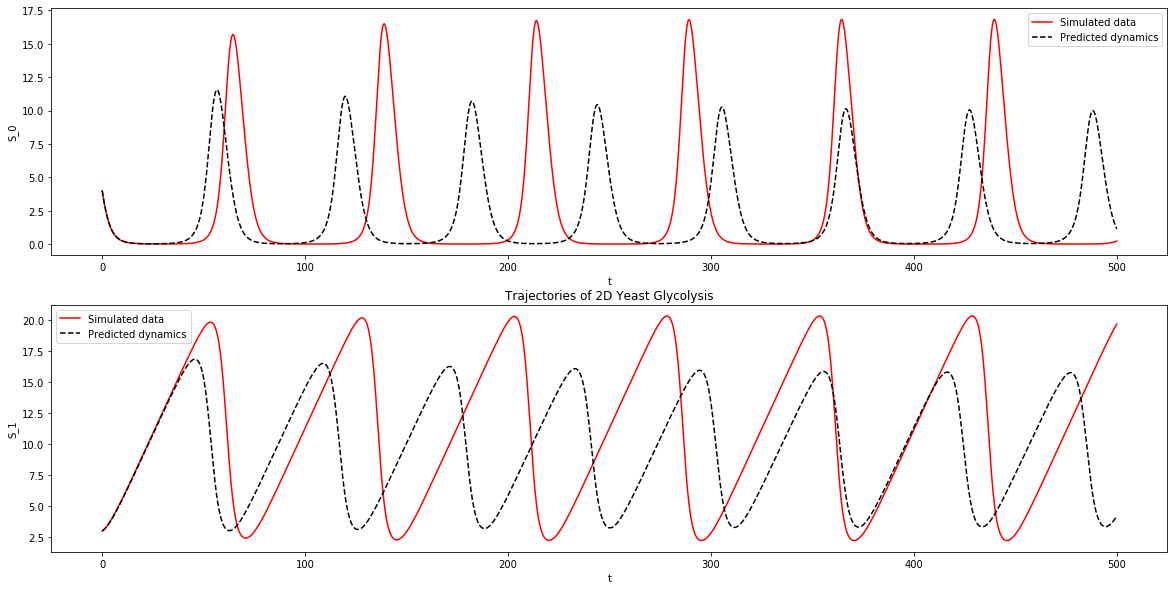

In [3]:
with open('bier.pkl', 'rb') as file:
    cubic = pickle.load(file)
time_points = cubic['t']
bier_pred = cubic['pred']
bier_data = cubic['data'].reshape(-1,2)

print("step size is ", time_points[1] - time_points[0])

plt.figure(figsize=(20, 10))

for species in range(2):
    plt.subplot(2,1,species + 1)
    plt.plot(time_points, bier_data[:, species], 'r-', label='Simulated data')
    plt.plot(time_points, bier_pred[:,species], 'k--', label='Predicted dynamics')
    plt.xlabel('t')
    plt.ylabel('S_' + str(species))
    plt.legend()
    
plt.title('Trajectories of 2D Yeast Glycolysis')
plt.show()

step size is  0.01


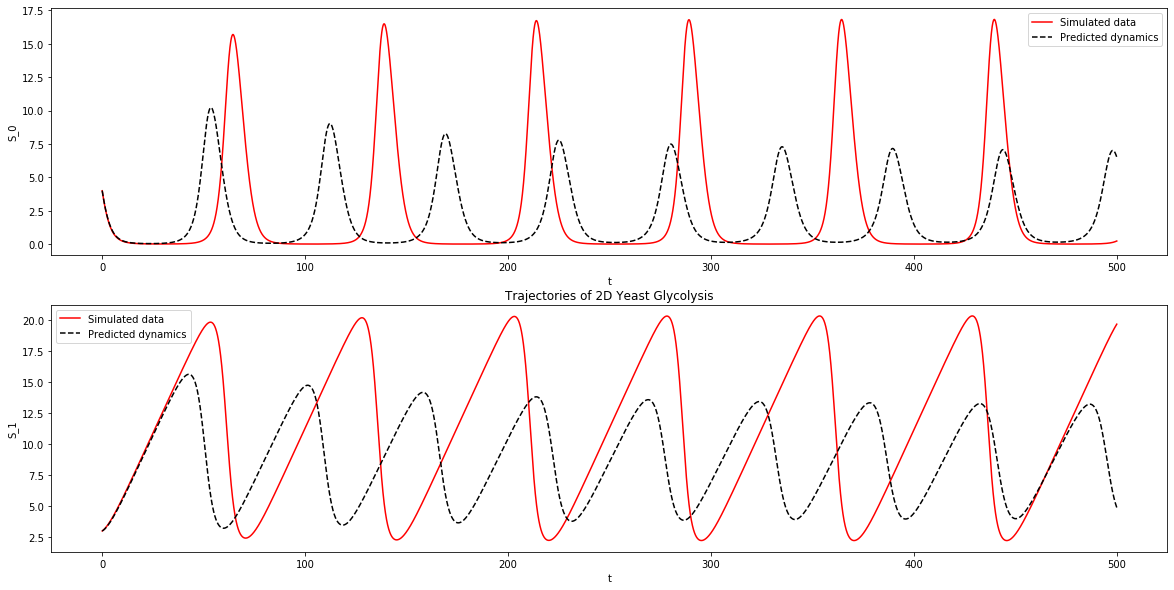

In [4]:
with open('bier.pkl', 'rb') as file:
    cubic = pickle.load(file)
time_points = cubic['t']
bier_pred = cubic['pred']
bier_data = cubic['data'].reshape(-1,2)

print("step size is ", time_points[1] - time_points[0])

plt.figure(figsize=(20, 10))

for species in range(2):
    plt.subplot(2,1,species + 1)
    plt.plot(time_points, bier_data[:, species], 'r-', label='Simulated data')
    plt.plot(time_points, bier_pred[:,species], 'k--', label='Predicted dynamics')
    plt.xlabel('t')
    plt.ylabel('S_' + str(species))
    plt.legend()
    
plt.title('Trajectories of 2D Yeast Glycolysis')
plt.show()